# ComWatt — Exercise Time Series

### Alban MIRRE

### June 2021


The notebook presents a study on the YEN/EUR rates in the past 20 years. From the data requests to machine learning prediction.















————————————————————————————————————————————————————————————————

# Import Libs

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Getting the data

#### Testing to get some data

In [2]:
params = {
    'start_date':'1999-02-01',
    'end_date': '1999-03-01',
    'base':'EUR', 
    'symbols':'JPY'
}

response = requests.get('https://api.exchangerate.host/timeseries', params)
print(response.json()['rates'])

{'1999-02-01': {'JPY': 130.88}, '1999-02-02': {'JPY': 127.7}, '1999-02-03': {'JPY': 126.86}, '1999-02-04': {'JPY': 127.65}, '1999-02-05': {'JPY': 127.95}, '1999-02-06': {'JPY': 127.95}, '1999-02-07': {'JPY': 127.95}, '1999-02-08': {'JPY': 127.82}, '1999-02-09': {'JPY': 129.91}, '1999-02-10': {'JPY': 130.73}, '1999-02-11': {'JPY': 129.35}, '1999-02-12': {'JPY': 128.92}, '1999-02-13': {'JPY': 128.92}, '1999-02-14': {'JPY': 128.92}, '1999-02-15': {'JPY': 129.31}, '1999-02-16': {'JPY': 131.82}, '1999-02-17': {'JPY': 133.48}, '1999-02-18': {'JPY': 134.4}, '1999-02-19': {'JPY': 133.97}, '1999-02-20': {'JPY': 133.97}, '1999-02-21': {'JPY': 133.97}, '1999-02-22': {'JPY': 133.61}, '1999-02-23': {'JPY': 133.14}, '1999-02-24': {'JPY': 133.86}, '1999-02-25': {'JPY': 132.87}, '1999-02-26': {'JPY': 131.33}, '1999-02-27': {'JPY': 131.33}, '1999-02-28': {'JPY': 131.33}, '1999-03-01': {'JPY': 131.13}}


#### Sending requests from 1999

In [3]:
dates = [str(i) for i in range(1999, 2020)]
print(dates)

['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [4]:
data = {}
for date in dates:
    fromDate = f'{date}-02-01'
    toDate = f'2019-03-31'
    
    params = {
    'start_date':fromDate,
    'end_date': toDate,
    'base':'EUR', 
    'symbols':'JPY'
    
    }

    response = requests.get('https://api.exchangerate.host/timeseries', params)
    rates = response.json()['rates']
    
    for timestamp in rates:
        data[timestamp] = rates[timestamp]['JPY']

#data

# From the data requests to Data Frame

In [5]:
df = pd.DataFrame(data.items(), columns=['date', 'rate'])
df.head(3)

,date,rate
0,1999-02-01,130.88
1,1999-02-02,127.70
2,1999-02-03,126.86


# Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7359 non-null   object 
 1   rate    7359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.1+ KB


In [7]:
df.columns

Index(['date', 'rate'], dtype='object')

In [8]:
df.index = df.date
df.index = pd.to_datetime(df.index)
df = df.drop(['date'], axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,rate
date,
1999-02-01,130.88
1999-02-02,127.70
1999-02-03,126.86
1999-02-04,127.65
1999-02-05,127.95


In [9]:
df.describe()

,rate
count,7359.000000
mean,127.572769
std,16.555744
min,89.300000
25%,115.124500
50%,128.990000
75%,136.407000
max,169.550000


For now, the above output are the values that describe the data set.
Since the mean and the median are really close, almost half of the values are above the mean, and the other half below the mean.


##### We can notice there is no missing value.

# Visualisation

### Plotting the data

In [10]:
def plot_df(df, title):
    df.plot(title=(title), figsize=(20,15))
    plt.xlabel('Date')
    plt.ylabel('Rate (JPY/EUR)')
    plt.show()

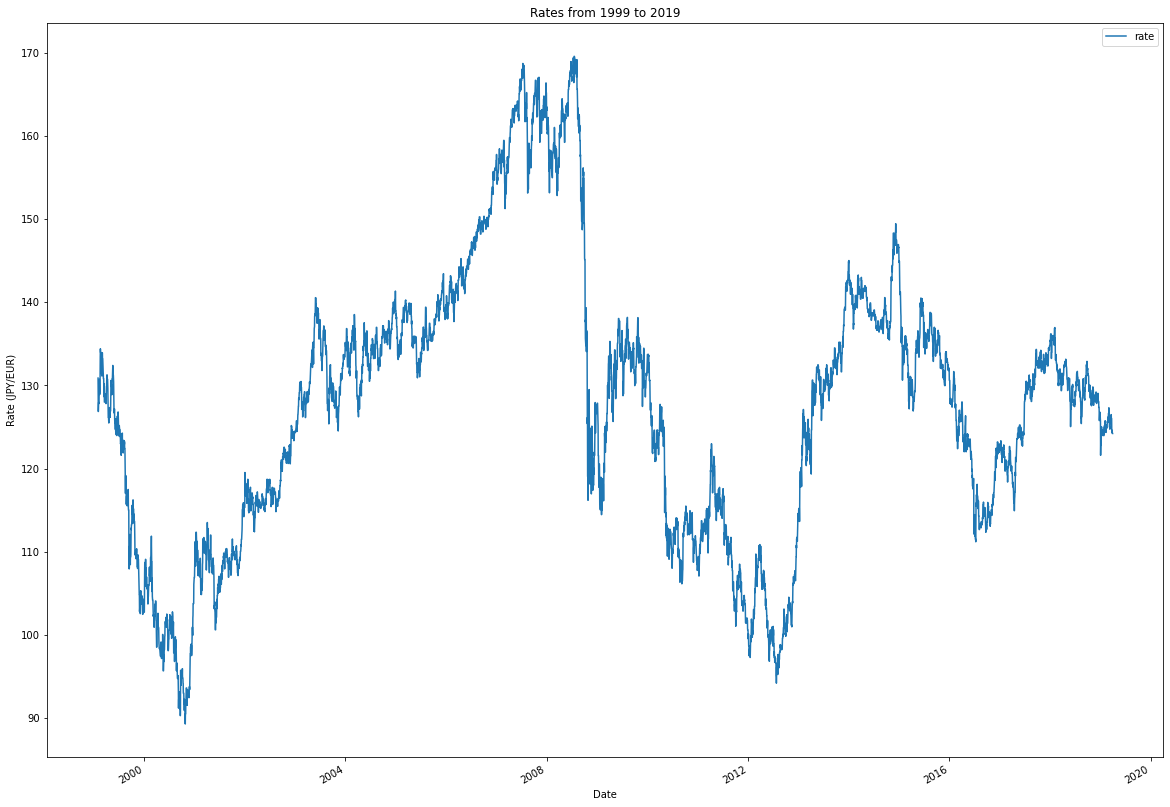

In [11]:
plot_df(df, "Rates from 1999 to 2019")

### Counting the occurrences

<AxesSubplot:ylabel='Count'>

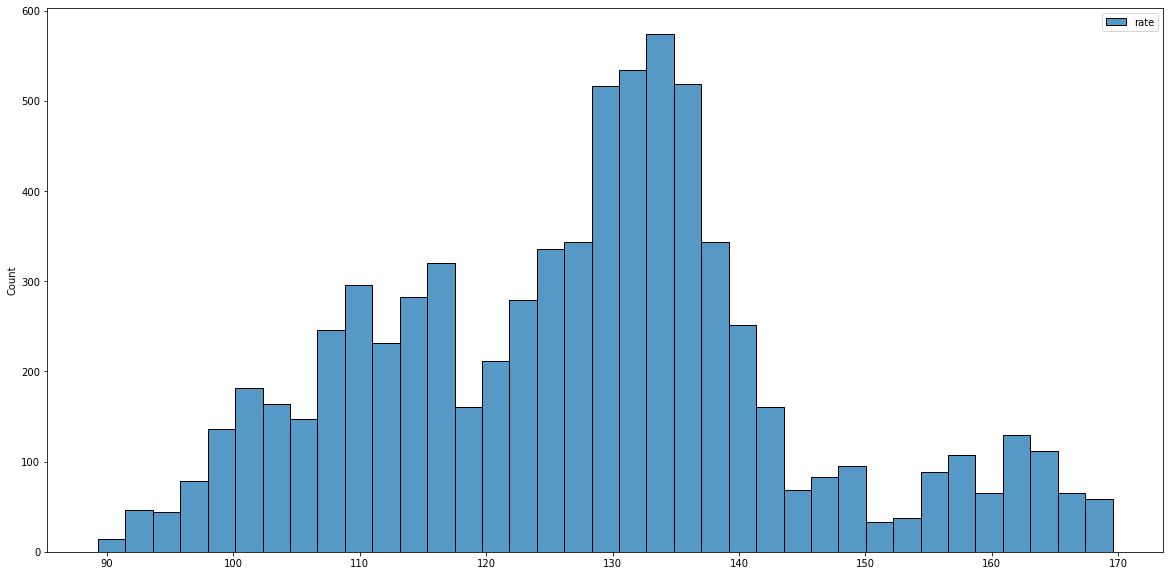

In [12]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.histplot(df)

### Plotting density

<AxesSubplot:xlabel='rate', ylabel='Density'>

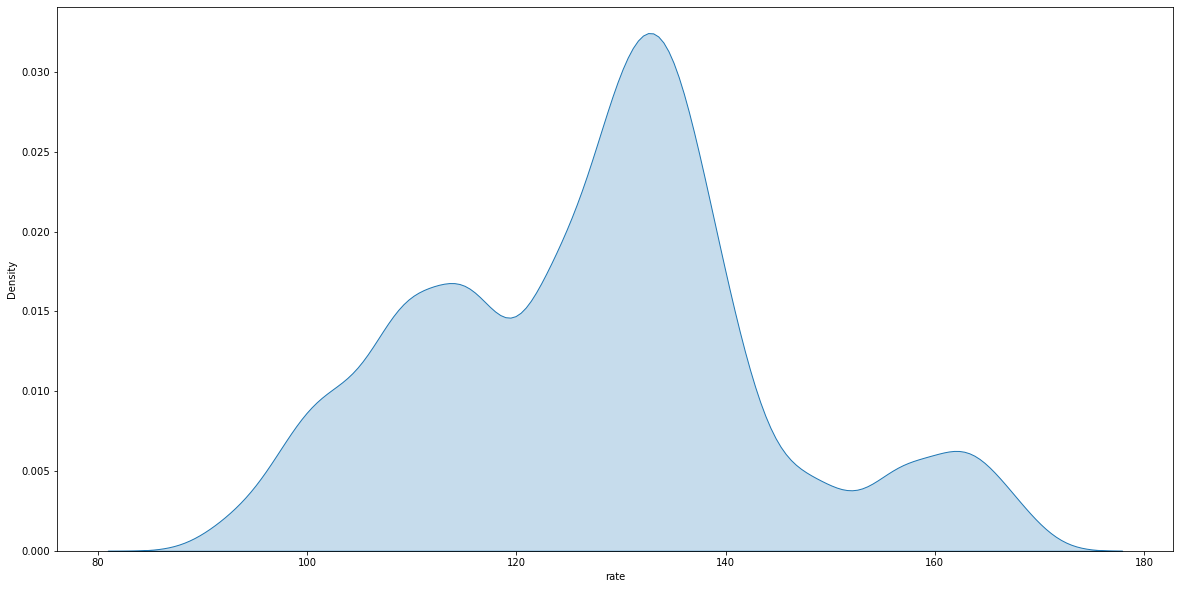

In [13]:
sns.kdeplot(df["rate"], fill=True)

### Rolling mean

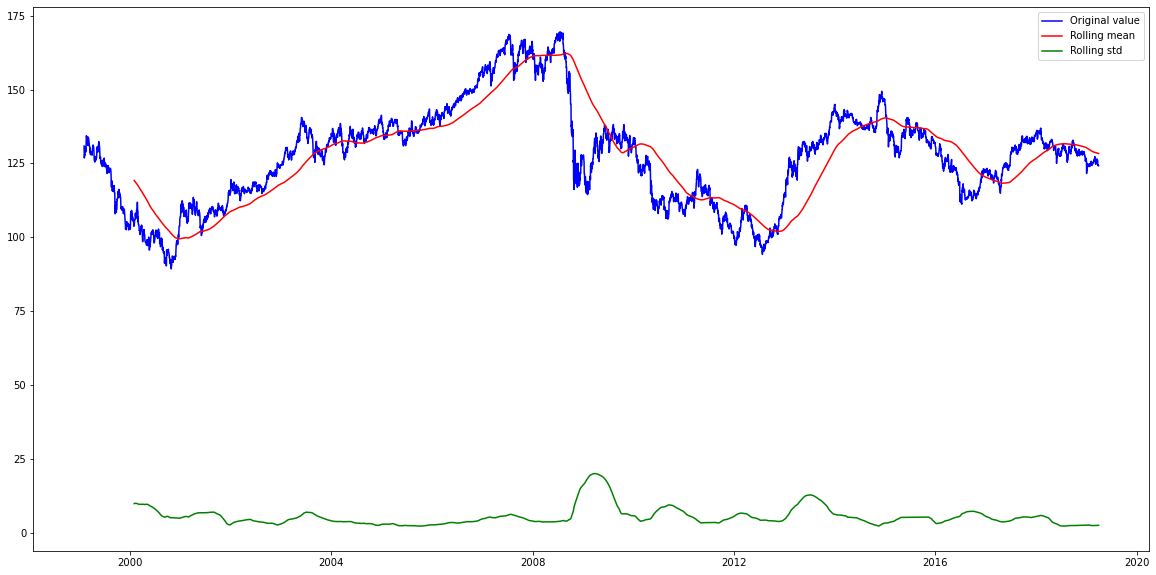

In [14]:
m =  df.rolling(365).mean()
mstd = df.rolling(365).std()

plt.plot(df, color = 'blue', label = "Original value")
plt.plot(m, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

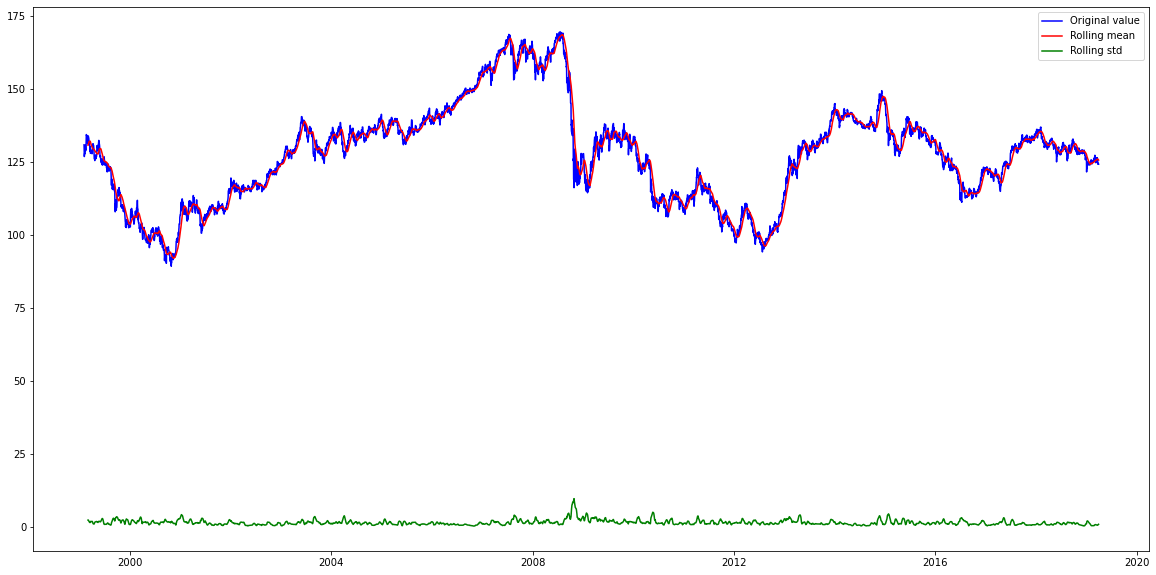

In [15]:
m =  df.rolling(30).mean()
mstd = df.rolling(30).std()

plt.plot(df, color = 'blue', label = "Original value")
plt.plot(m, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

Data are non-stationary data. 

#### Let's have a look at the trend and seasonality

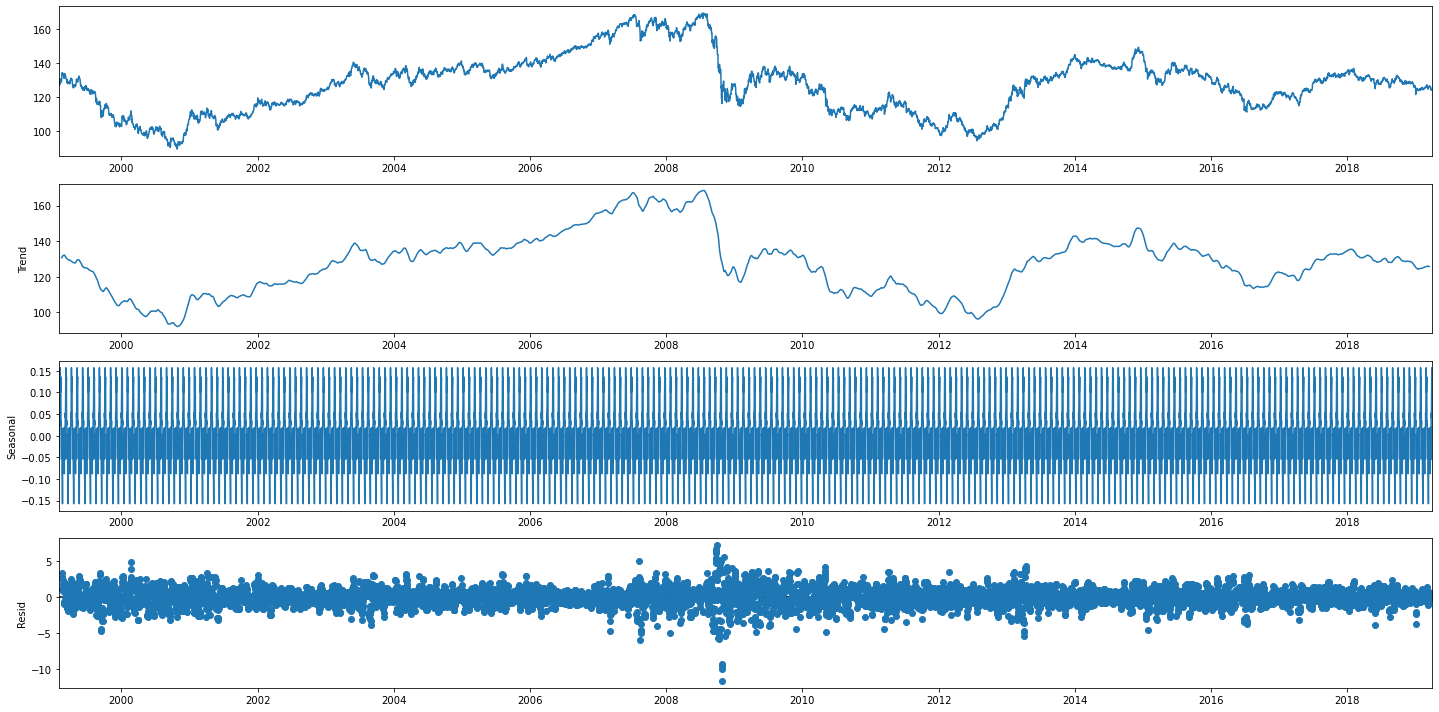

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
df_decompose = sm.tsa.seasonal_decompose(df, period = 30)
fig = df_decompose.plot()
plt.show()

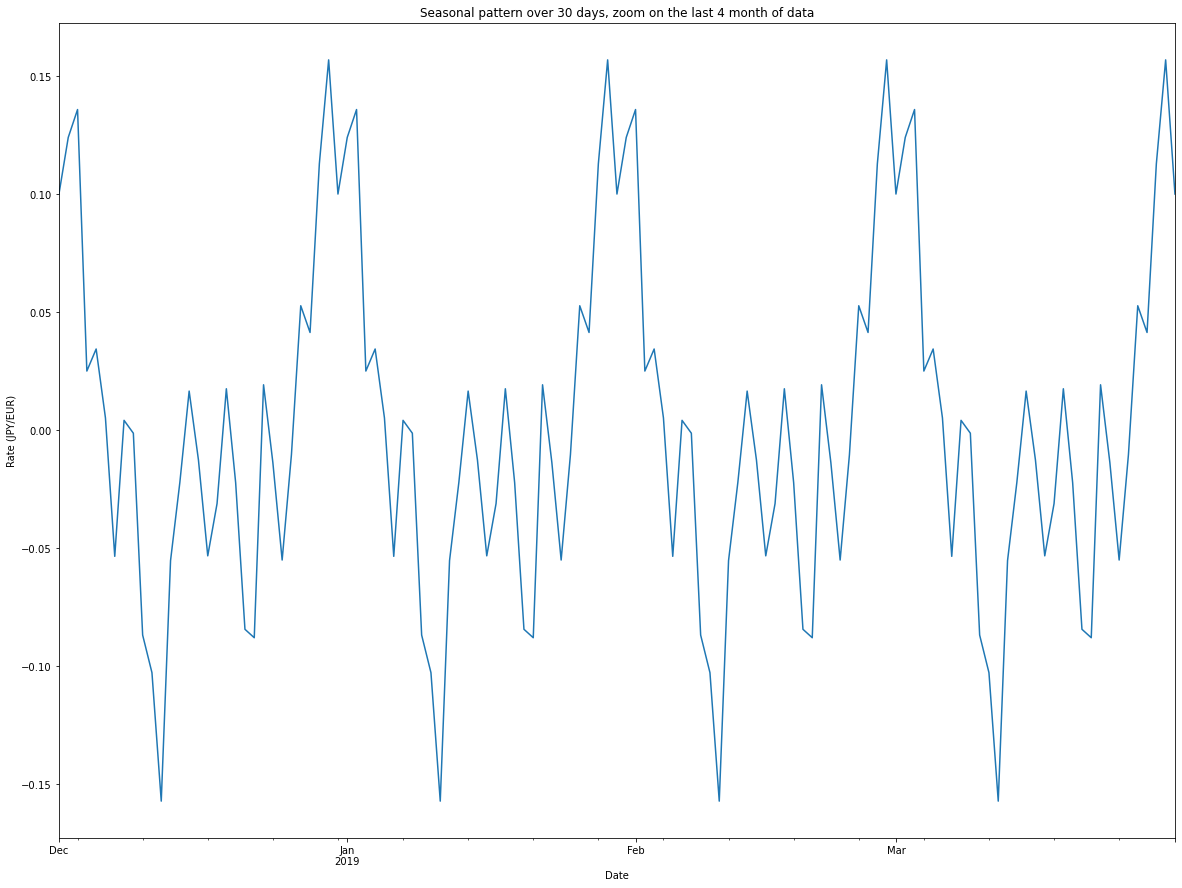

In [17]:
plot_df(df_decompose.seasonal['2018-12-01':'2019-03-31'], "Seasonal pattern over 30 days, zoom on the last 4 month of data")

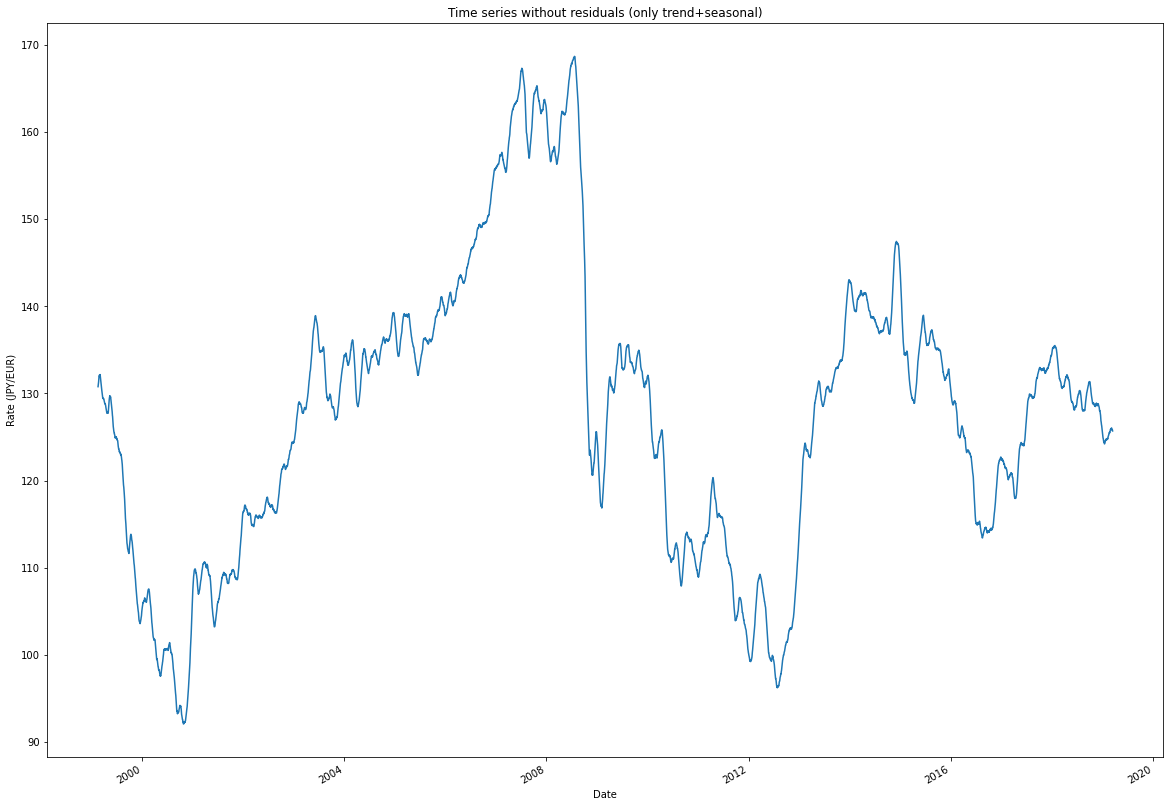

In [18]:
plot_df((df_decompose.trend+df_decompose.seasonal), "Time series without residuals (only trend+seasonal)")

#### Without the residuals, the data are smoother. 
#### We can notice the huge decrease in the middle of the chart due to 2008 subprimes crisis.

# Modeling ML & Prediction

We want to make a prediction based on the values of the past month.

#### Preparing the data

In [19]:
dataset = df[["rate"]]
dataset.columns = ["target"]

for i in range(30, 60):
    dataset[f"t-{i}"] = dataset.target.shift(i)


dataset[30:35]

,target,t-30,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,...,t-50,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59
date,,,,,,,,,,,,,,,,,,,,,
1999-03-03,132.18,130.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-04,133.92,127.70,130.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-05,133.19,126.86,127.70,130.88,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-06,133.19,127.65,126.86,127.70,130.88,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-07,133.19,127.95,127.65,126.86,127.70,130.88,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset.tail(5)

,target,t-30,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,...,t-50,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59
date,,,,,,,,,,,,,,,,,,,,,
2019-03-27,124.62,125.632,125.540,125.540,125.540,125.672,125.394,125.093,124.900,124.850,...,125.753,125.340,124.580,124.580,124.580,125.165,125.110,124.850,124.854,123.969
2019-03-28,124.31,126.206,125.632,125.540,125.540,125.540,125.672,125.394,125.093,124.900,...,125.432,125.753,125.340,124.580,124.580,124.580,125.165,125.110,124.850,124.854
2019-03-29,124.22,125.930,126.206,125.632,125.540,125.540,125.540,125.672,125.394,125.093,...,124.980,125.432,125.753,125.340,124.580,124.580,124.580,125.165,125.110,124.850
2019-03-30,124.22,126.156,125.930,126.206,125.632,125.540,125.540,125.540,125.672,125.394,...,124.454,124.980,125.432,125.753,125.340,124.580,124.580,124.580,125.165,125.110
2019-03-31,124.22,126.646,126.156,125.930,126.206,125.632,125.540,125.540,125.540,125.672,...,124.454,124.454,124.980,125.432,125.753,125.340,124.580,124.580,124.580,125.165


In [21]:
dataset = dataset.iloc[59:]
dataset.head()

,target,t-30,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,...,t-50,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59
date,,,,,,,,,,,,,,,,,,,,,
1999-04-01,128.72,131.37,131.13,131.33,131.33,131.33,132.87,133.86,133.14,133.61,...,130.73,129.91,127.82,127.95,127.95,127.95,127.65,126.86,127.70,130.88
1999-04-02,129.85,132.18,131.37,131.13,131.33,131.33,131.33,132.87,133.86,133.14,...,129.35,130.73,129.91,127.82,127.95,127.95,127.95,127.65,126.86,127.70
1999-04-03,129.85,133.92,132.18,131.37,131.13,131.33,131.33,131.33,132.87,133.86,...,128.92,129.35,130.73,129.91,127.82,127.95,127.95,127.95,127.65,126.86
1999-04-04,129.85,133.19,133.92,132.18,131.37,131.13,131.33,131.33,131.33,132.87,...,128.92,128.92,129.35,130.73,129.91,127.82,127.95,127.95,127.95,127.65
1999-04-05,130.55,133.19,133.19,133.92,132.18,131.37,131.13,131.33,131.33,131.33,...,128.92,128.92,128.92,129.35,130.73,129.91,127.82,127.95,127.95,127.95


The set is divided in two subsets for training part and prediction part.

In [22]:
train, test = dataset["1999-03-02":"2019-03-01"], dataset["2019-03-01":"2019-03-31"]

Standard scaler will transforme features such as they will have mean equal to 0 and the standard deviation equal to 1 after the transformation.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train.drop(['target'], axis=1))
test_features_scaled = scaler.transform(test.drop(['target'], axis=1))

Then we import the linear model, and train it with the training set.
After that a prediction can be made on the test set, then plot the results.

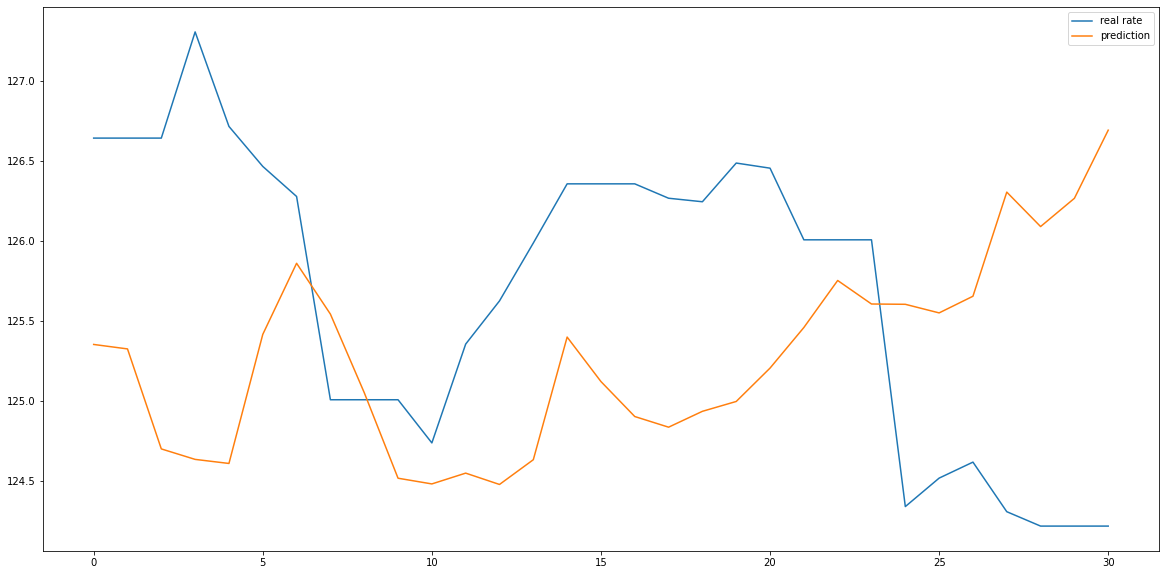

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_features_scaled, train['target'])

prediction = model.predict(test_features_scaled)
    
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real rate")
plt.plot(prediction, label="prediction")
plt.legend()

It's possible to plot the weight of each day in the previous month on the model.

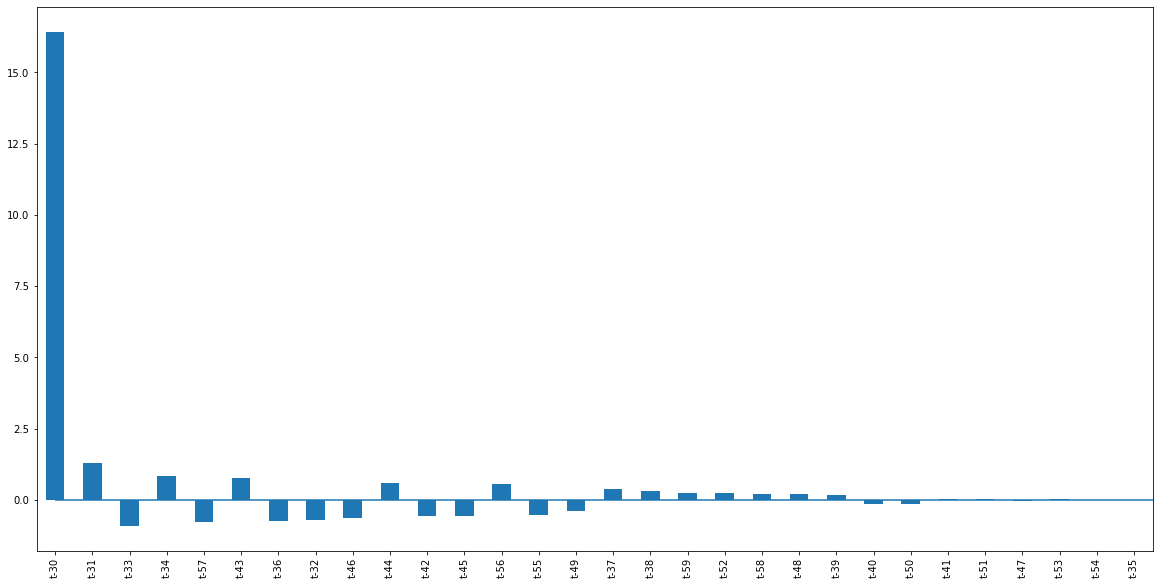

In [25]:
features_weights = pd.DataFrame(data=model.coef_, index = train.drop(['target'], axis=1).columns)
features_weights.columns = ["weights"]
features_weights["absolute_value"] = features_weights["weights"].apply(np.abs)
features_weights = features_weights.sort_values(by="absolute_value", ascending=False).drop(["absolute_value"], axis=1)
    
features_weights['weights'].plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=len(features_weights))

#### Measuring the error

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score is {}".format(r2_score(test['target'].values, prediction)))
print("MSE score is {}".format(mean_squared_error(test['target'].values, prediction)))
print("MAE score is {}".format(mean_absolute_error(test['target'].values, prediction)))

R2 score is -1.2452667604670413
MSE score is 1.8921154104127285
MAE score is 1.209809896027149


### Discussing the model

Here R2 is negative and indicates that the linear model isn't the best choice. 
However, the MSE and MAE are small in front of the values we are treating with. It can be interpreted as a good accuracy in the prediction, if we randomly take a value in the predicted rate we would expect the prediction to be around ~1.5 away from the actual rate.

### Improvement clue

Despite the seasonality in our data, the distribution looks somehow chaotic.
In order to improve the model a random forest regressor could be used instead of a linear regressor.

# Random Forest

The purpose is to make a random forest model on the same training set, in order to study if the model suits better.

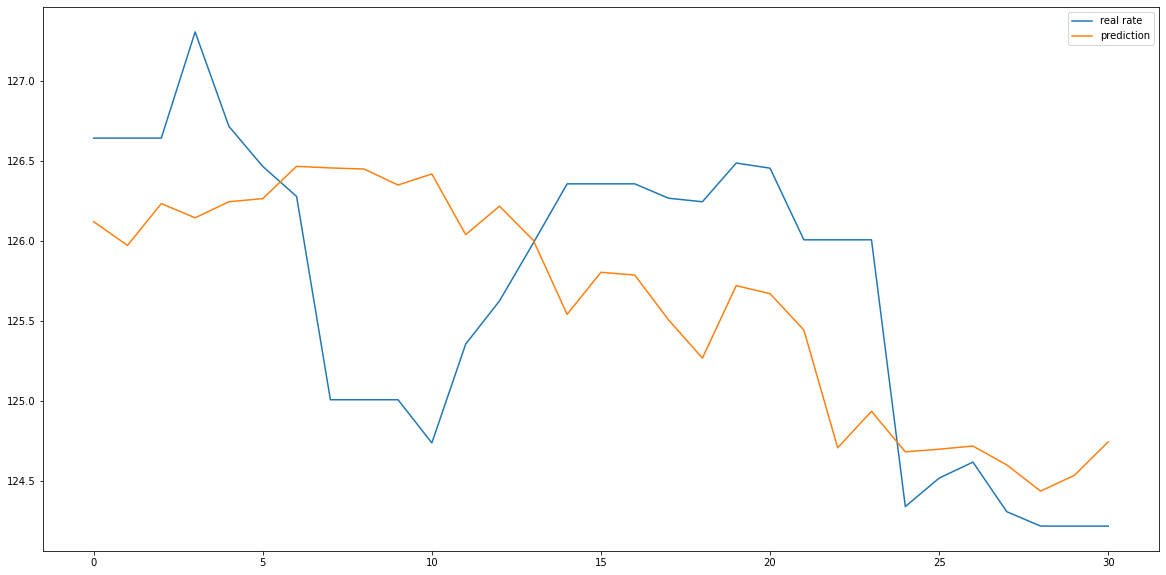

In [27]:
from sklearn.ensemble import RandomForestRegressor
from numpy import asarray

train_features = train.drop(['target'], axis=1, inplace=False)
train_target = train['target']
test_features =  test.drop(['target'],axis=1, inplace=False)

model_RanFor = RandomForestRegressor(max_depth=10, random_state=0, max_features=3, n_estimators=200)
model_RanFor.fit(asarray(train_features), asarray(train_target))

prediction_RanFor = model_RanFor.predict(test_features)
    
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real rate")
plt.plot(prediction_RanFor, label="prediction")
plt.legend()

#### Weigth of the parameters

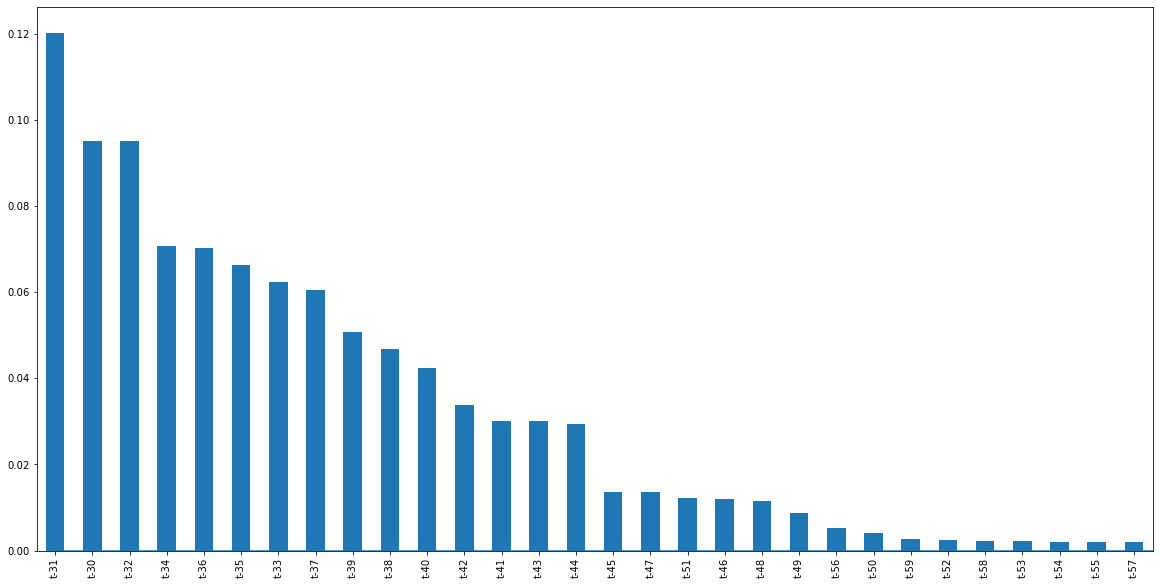

In [28]:
features_weights = pd.DataFrame(data=model_RanFor.feature_importances_, index = train.drop(['target'], axis=1).columns)
features_weights.columns = ["weights"]
features_weights["absolute_value"] = features_weights["weights"].apply(np.abs)
features_weights = features_weights.sort_values(by="absolute_value", ascending=False).drop(["absolute_value"], axis=1)
    
features_weights['weights'].plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=len(features_weights))

We can notice a real difference in the distribution of the weight of the parameters in the models. The linear model gave a big importance to only one parameter. It looks like the random forest model makes more sense with our dataset. 

#### Measuring the error

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score is {}".format(r2_score(test['target'].values, prediction_RanFor)))
print("MSE score is {}".format(mean_squared_error(test['target'].values, prediction_RanFor)))
print("MAE score is {}".format(mean_absolute_error(test['target'].values, prediction_RanFor)))

R2 score is 0.23295685111232267
MSE score is 0.6463972067889096
MAE score is 0.6768202480288305


### Discussing the model

Here R2 is positive and a lot better than the linear model, Random forest is better.
Plus, the MSE and MAE are smaller too. Here the error is divided by two which is consequent. Those values represents an error of less than 1%.

### Decision tree

In [31]:
import graphviz
from sklearn.tree import export_graphviz
import pydot
tree = model_RanFor.estimators_[9]
export_graphviz(tree, out_file = 'tree.dot', feature_names = train_features.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.set_size('"15000!"')
graph.write_png('resized_tree.png')
#graphviz.Source(graph)

The image of the decision tree is accessible in "/python/resized_tree.png"

### Improvement clue

In order to have a better model for this time series, we could explore another lib like statsmodels. Using an Autoregressive integrated moving average (ARIMA) model from the Time Series analysis module, we could obtain a better fitting model in order to make forecasts.

